In [1]:
# 구글 드라이브 마운트
# 처음 실행 시 인증을 요구하며, 구글 계정으로 승인해 줘야 합니다.
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

flight = pd.read_csv('/content/drive/MyDrive/AICE/Clean_Dataset.csv', encoding = 'cp949')
flight

Mounted at /content/drive


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## **지표로 데이터 탐색하기**

In [ ]:
flight.describe()
# count: 해당 칼럼의 유효한 데이터 수

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
flight.describe(include='all') # 전체 칼럼의 요약 통계량 구하기
# unique: 해당 칼럼에서 고유한 데이터의 수(distinct)
# top: 최빈값
# freq: 해당 칼럼에서 최빈값이 존재하는 개수

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,NaN,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,NaN,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,NaN,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,86646.852011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,75038.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,225114.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [ ]:
flight.corr(numeric_only = True) # 상관계수 확인하기

,Unnamed: 0,duration,days_left,price
Unnamed: 0,1.000000,0.159007,0.014638,0.761177
duration,0.159007,1.000000,-0.039157,0.204222
days_left,0.014638,-0.039157,1.000000,-0.091949
price,0.761177,0.204222,-0.091949,1.000000


In [ ]:
flight_eco = flight[(flight['class']=='Economy')] # class를 Economy로 한정하여 새로운 데이터프레임 flight_eco 생성하기
flight_eco.corr(numeric_only = True) # 상관계수 확인하기

,Unnamed: 0,duration,days_left,price
Unnamed: 0,1.000000,0.077125,0.043810,0.026724
duration,0.077125,1.000000,-0.042537,0.288379
days_left,0.043810,-0.042537,1.000000,-0.559551
price,0.026724,0.288379,-0.559551,1.000000


In [ ]:
pd.crosstab(flight['source_city'],flight['departure_time']) # 교차표는 범주형 데이터 상관관계 확인 가능
# 출발 도시별로 어느 시간에 비행기 이륙이 많은지

departure_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
source_city,,,,,,
Bangalore,5183,13611,14243,457,12323,6244
Chennai,5807,9319,5402,72,10550,7550
Delhi,11234,12248,16790,357,13679,7035
Hyderabad,7221,8524,5991,38,9923,9109
Kolkata,7863,8133,9594,114,12065,8578
Mumbai,10486,14955,13082,268,12606,9499


## **시각화로 데이터 탐색하기**

**선그래프**

In [ ]:
days_left = flight.groupby('days_left').mean(numeric_only = True)
days_left.head()

,Unnamed: 0,duration,price
days_left,,,
1,97455.828749,14.250228,21591.867151
2,150931.092896,14.111080,30211.299801
3,148025.511064,14.287476,28976.083569
4,149597.375616,13.742667,25730.905653
5,153294.487018,12.921970,26679.773368


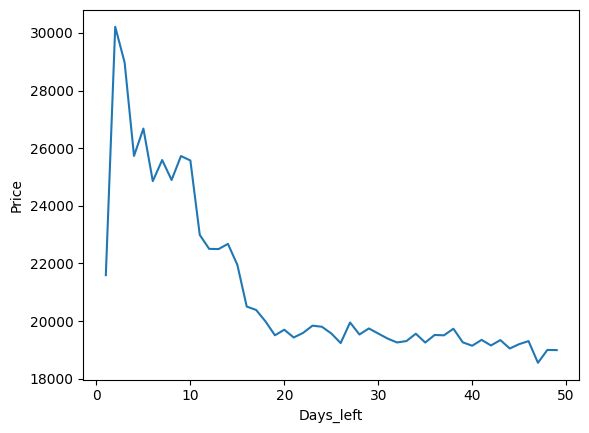

In [ ]:
import matplotlib.pyplot as plt # 시각화 라이브러리 불러오기
plt.figure() # 시각화 영역 지정하기
plt.plot(days_left['price']) # price 데이터로 선 그래프 그리기
plt.xlabel('Days_left')
plt.ylabel('Price')
plt.show()
# 항공권을 미리 구매할 수록 저렴함

**막대그래프**

In [ ]:
airline = flight.groupby(['airline']).mean(numeric_only = True)
airline

,Unnamed: 0,duration,days_left,price
airline,,,,
AirAsia,95102.971922,8.941714,27.735184,4091.072742
Air_India,162945.107007,15.504235,25.497466,23507.019112
GO_FIRST,87630.797005,8.755380,27.430415,5652.007595
Indigo,110102.972658,5.795197,26.264309,5324.216303
SpiceJet,91878.408834,12.579767,24.122850,6179.278881
Vistara,177755.288310,13.326634,25.894532,30396.536302


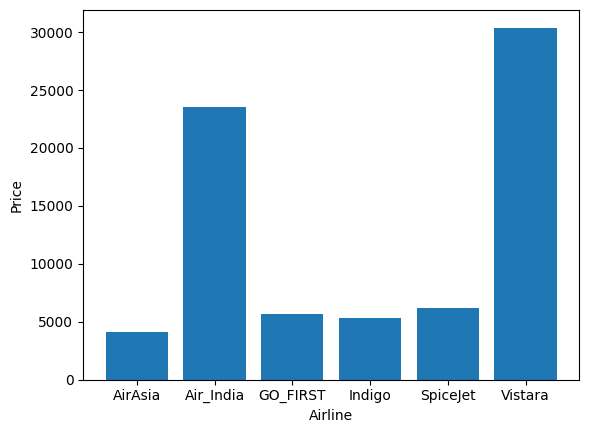

In [ ]:
label = airline.index
plt.figure()
plt.bar(label, airline['price'])
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()
# Air_India와 Vistara가 가격이 비쌈abel = airline.index
plt.figure()
plt.bar(label, airline['price'])
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()
# Air_India와 Vistara가 가격이 비쌈

**파이 그래프(pie plot)**

In [ ]:
departure_time = flight['departure_time'].value_counts()
departure_time

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


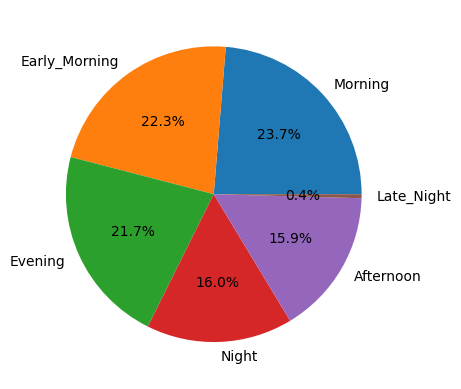

In [ ]:
plt.figure()
plt.pie(departure_time, labels = departure_time.index, autopct = '%.1f%%')
plt.show()

**히스토그램(histogram)**

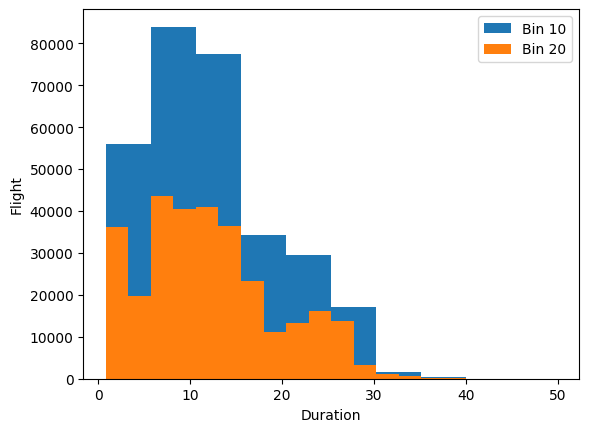

In [ ]:
plt.figure()
plt.hist(flight['duration'], bins = 10) # 10개 구간으로 나눠서 히스토그램 그리기
plt.hist(flight['duration'], bins = 20) # 20개 구간으로 나눠서 히스토그램 그리기
plt.xlabel('Duration')
plt.ylabel('Flight')

plt.legend(('Bin 10', 'Bin 20')) # 범례 지정하기
plt.show()

**상자 그래프(box plot)**

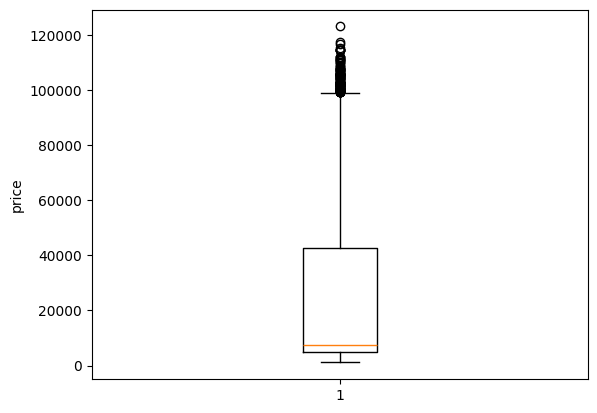

In [ ]:
plt.figure()

plt.boxplot(flight['price'])
plt.ylabel('price')
plt.show()

<Axes: title={'center': 'price'}, xlabel='departure_time'>

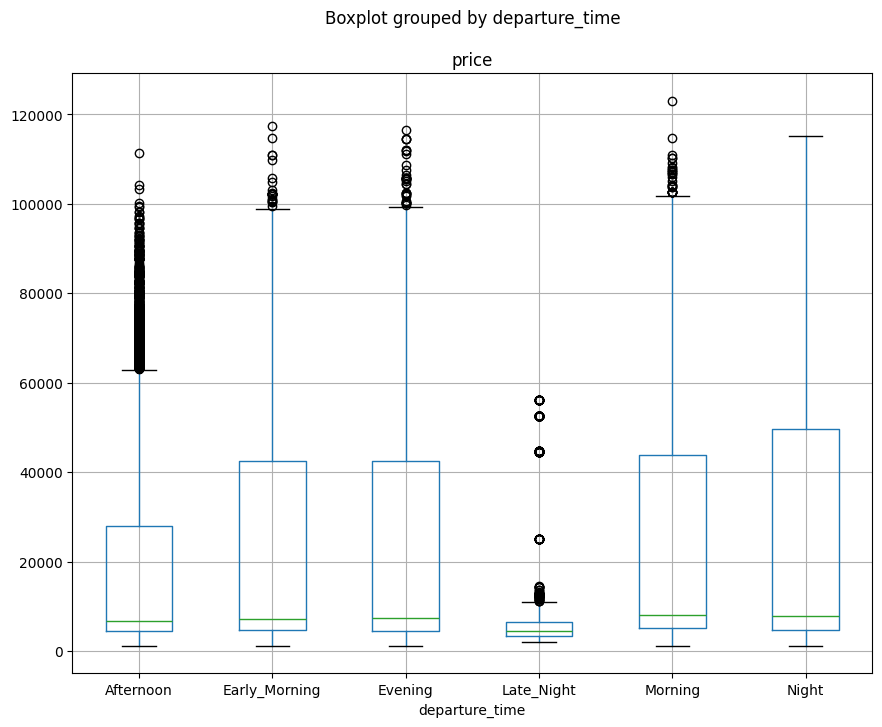

In [ ]:
flight.boxplot(by = 'departure_time', column = 'price', figsize = (10, 8)) # plt가 아니라 데이터프레임의 함수임.

# 다변량 시각화 탐색하기
**산점도(scatter plot)**

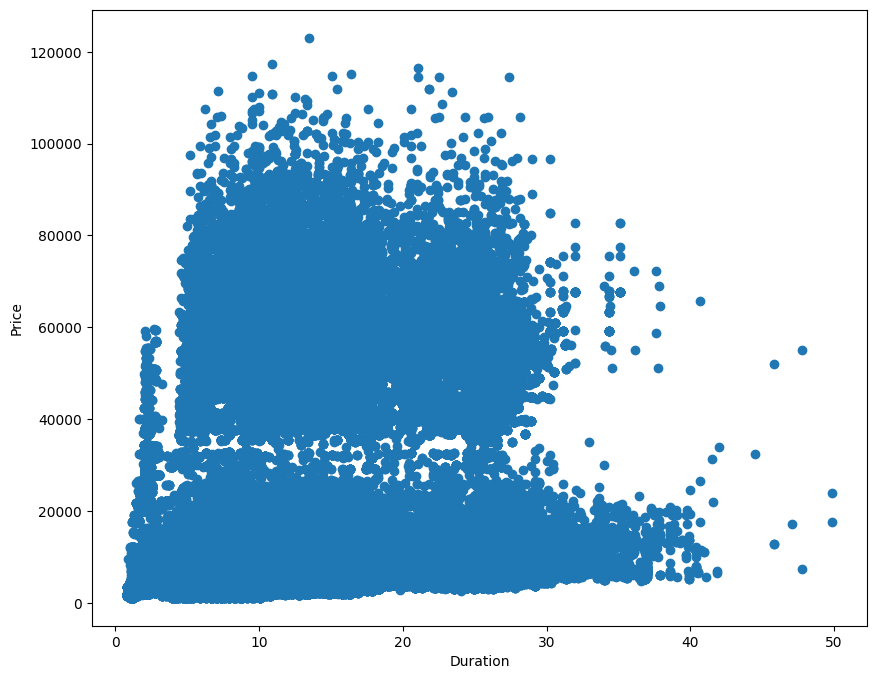

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(y = flight['price'], x = flight['duration'])
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

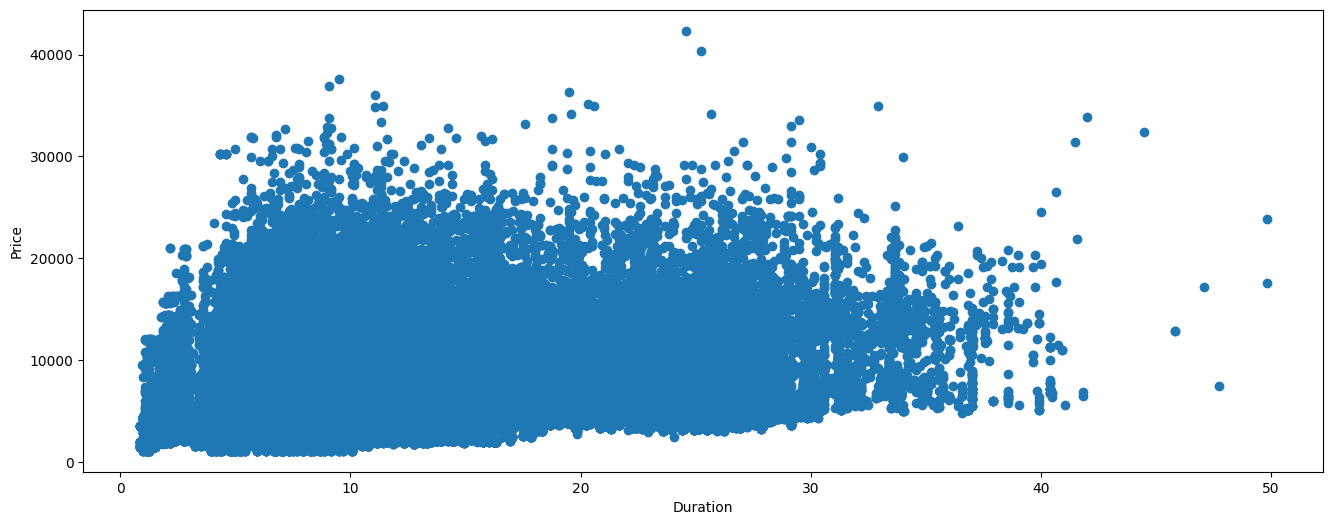

In [ ]:
flight_eco = flight[(flight['class']=='Economy')]

plt.figure(figsize = (16,6))
plt.scatter(y = flight_eco['price'], x = flight_eco['duration'])
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

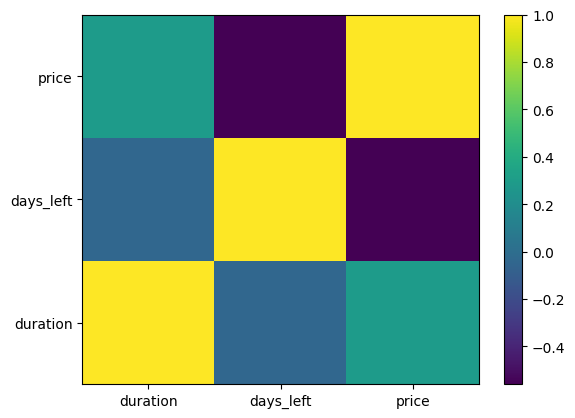

In [ ]:
heat = flight_eco.drop('Unnamed: 0', axis = 1).corr(numeric_only = True)# 상관계수 데이터 만들기

plt.pcolor(heat) # 상관계수로 heatmap 그리기

plt.xticks(np.arange(0.5, len(heat.columns), 1), heat.columns)
plt.yticks(np.arange(0.5, len(heat.index),1), heat.index)
plt.colorbar()
plt.show()

**범주형 산점도(categorical plot: 범주형 데이터와 수치형 데이터의 관계를 시각화함)**

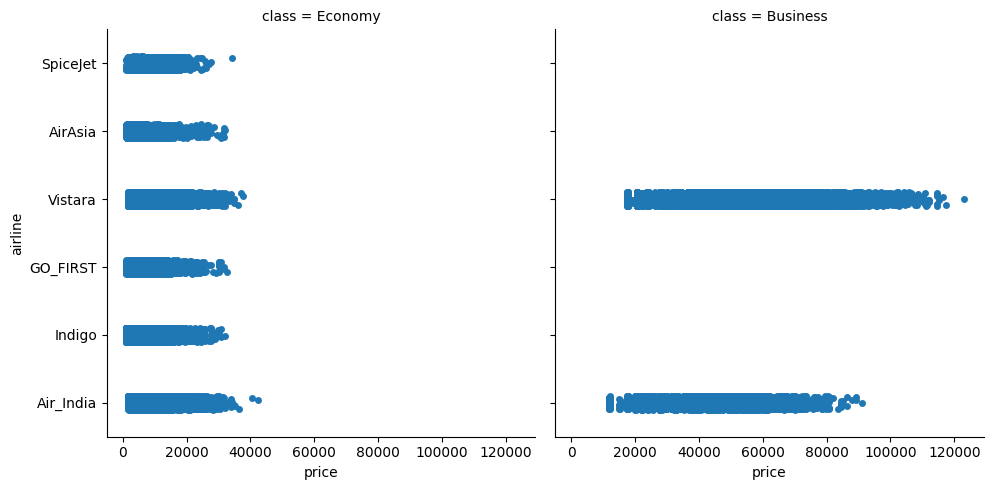

In [9]:
import seaborn as sns
sns.catplot(y = 'airline', x = 'price', col = 'class', data = flight)
# 비즈니스 클래스는 2개의 항공사만 운영, 가격은 이코노미 클래스의 2~3배, 이코노미 클래스의 가격은 모든 항공사가 40,000 이하의 가격을 책정함

**선형 회귀 모델 그래프(linear model plot: 일반적인 산점도와 함께 직선의 회귀선을 그려줌, 이상치 데이터도 짐작할 수 있음)**

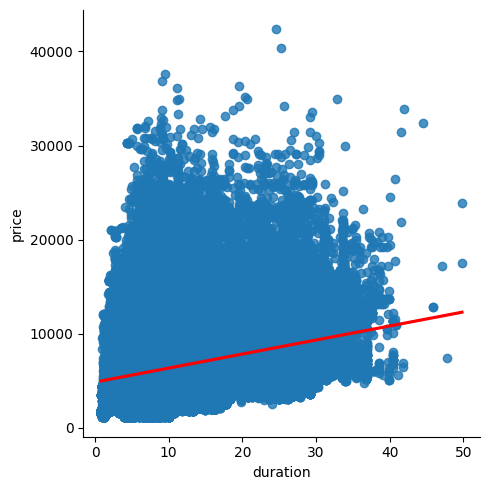

In [11]:
flight_eco = flight[(flight['class']=='Economy')] # class를 Economy로 한정하여 새로운 데이터프레임 flight_eco 생성하기
sns.lmplot(x = 'duration', y = 'price', data = flight_eco, line_kws = {'color':'red'}) # line_kws 파라미터는 회귀선의 색, 형태, 넓이 등 선에 대한 속성을 설정할 수 있음

빈도 그래프(count plot: 범주형 데이터에 대하여 항목별 개수를 세어서 막대 그래프를 그려줌)

<Axes: xlabel='airline', ylabel='count'>

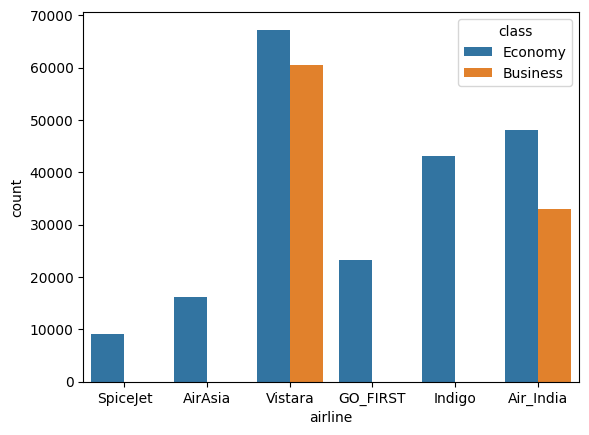

In [13]:
sns.countplot(x = 'airline', hue = 'class', data = flight) # hue 파라미터로 손쉽게 범례를 하나 추가함.

조인트 그래프(joint plot: 중앙의 산점도와 그래프 가장자리의 히스토그램을 동시에 그려줌. 수치형 데이터만 가능)

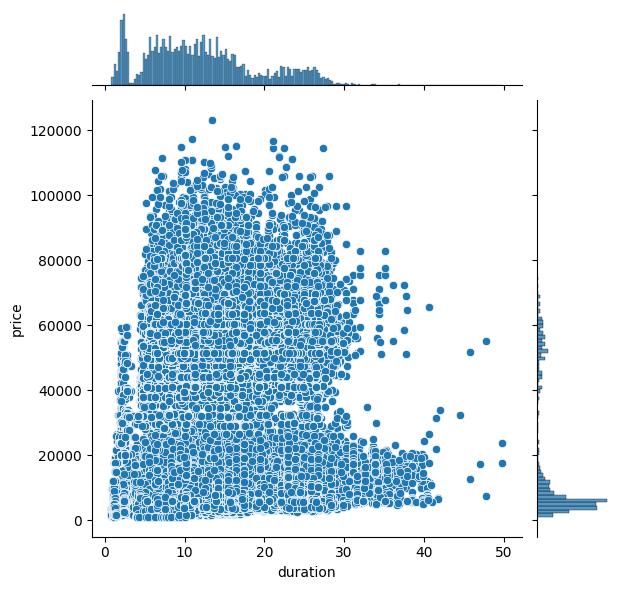

In [14]:
sns.jointplot(y = 'price', x = 'duration', data = flight)

**히트맵(heatmap)**

<Axes: >

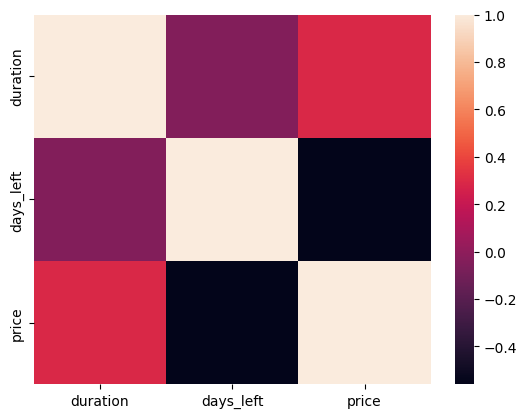

In [19]:
sns.heatmap(flight_eco.drop('Unnamed: 0', axis = 1).corr(numeric_only = True))